In [33]:
import quandl
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import datetime

from sklearn.model_selection import train_test_split #split data into train and test
from sklearn import preprocessing #standardize data, mean = 0, std = 1
from sklearn.linear_model import LinearRegression

In [34]:
quandl.ApiConfig.api_key = "6W2mxE3ZNvLZCpGwrjFa"

df = quandl.get("WIKI/AMZN")
#df.head()
df = df[["Adj. Close"]]
df

,Adj. Close
Date,
1997-05-16,1.729167
1997-05-19,1.708333
1997-05-20,1.635833
1997-05-21,1.427500
1997-05-22,1.395833
...,...
2018-03-21,1581.860000
2018-03-22,1544.100000
2018-03-23,1495.560000


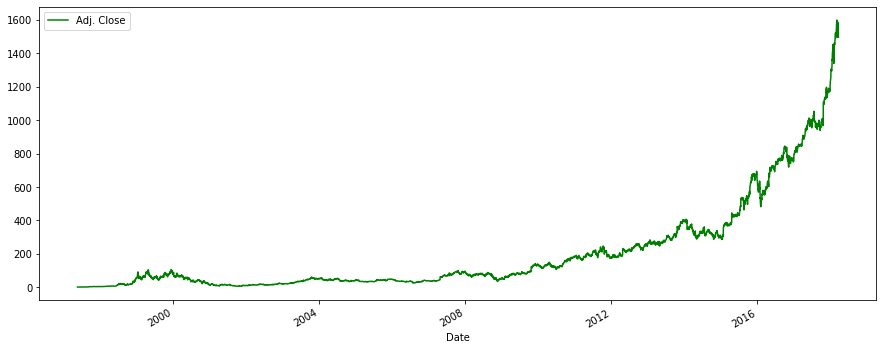

In [35]:
df["Adj. Close"].plot(figsize=(15,6), color="g")
plt.legend(loc="upper left")
plt.show()

In [36]:
forecast = 30 #30 days
df["Prediction"] = df[["Adj. Close"]].shift(-forecast) #new label column with our prediction data shifted 30 days up

X = np.array(df.drop(["Prediction"], 1))
X = preprocessing.scale(X)

#X.mean()
#X.std()

X_forecast = X[-forecast:]
X = X[:-forecast] 

y = np.array(df["Prediction"])
y = y[:-forecast]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#initialize linear regression model
clf = LinearRegression() #estimator instance, a classifier
clf.fit(X_train, y_train)

confidence = clf.score(X_test,y_test)
#confidence
forecast_predicted = clf.predict(X_forecast)
print(forecast_predicted)

[1498.97338453 1537.7883287  1549.16512269 1535.28139744 1556.16540955
 1571.64252331 1573.59707989 1589.78590718 1613.10249242 1602.5117701
 1603.01103184 1582.82811067 1590.05147193 1614.86584237 1629.76933627
 1637.58756257 1644.87465937 1673.58752038 1694.30157105 1683.45590657
 1686.45147697 1677.23106878 1665.92863292 1637.51320444 1681.68193402
 1676.74242963 1636.63152946 1585.06947718 1649.12369541 1586.6522431 ]


(736445.0, 737192.5)

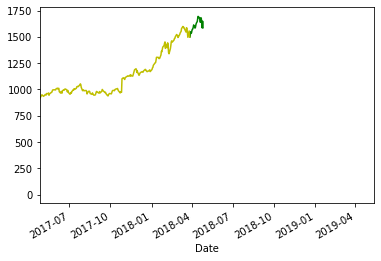

In [45]:
dates = pd.date_range(start="2018-03-28", end="2018-04-26")
#print(dates)
plt.plot(dates, forecast_predicted, color="g")
df["Adj. Close"].plot(color="y")
plt.xlim(xmin=datetime.date(2017,4,26))
